In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=128,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 43713 files belonging to 24 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=256,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 11149 files belonging to 24 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=24,activation='softmax'))

In [15]:
cnn.compile(optimizer=Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │        36,024 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,821,748 (29.84 MB)

 Trainable params: 7,821,748 (29.84 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set, epochs=10)

Epoch 1/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 1014s 3s/step - accuracy: 0.3189 - loss: 2.3028 - val_accuracy: 0.8007 - val_loss: 0.6398
Epoch 2/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 1130s 3s/step - accuracy: 0.7630 - loss: 0.7086 - val_accuracy: 0.8969 - val_loss: 0.3273
Epoch 3/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 1043s 3s/step - accuracy: 0.8471 - loss: 0.4317 - val_accuracy: 0.8977 - val_loss: 0.3082
Epoch 4/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 845s 2s/step - accuracy: 0.8826 - loss: 0.3086 - val_accuracy: 0.9433 - val_loss: 0.1775
Epoch 5/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 849s 2s/step - accuracy: 0.9088 - loss: 0.2304 - val_accuracy: 0.9385 - val_loss: 0.1864
Epoch 6/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 1079s 3s/step - accuracy: 0.9227 - loss: 0.1924 - val_accuracy: 0.9308 - val_loss: 0.2017
Epoch 7/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 1122s 3s/step - accuracy: 0.9305 - loss: 0.1638 - val_accuracy: 0.9301 - val_loss: 0.1812
Epoch 8/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 851s 2s/step - accuracy: 0.9354 - loss: 0.1521 - val

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

342/342 ━━━━━━━━━━━━━━━━━━━━ 234s 682ms/step - accuracy: 0.9567 - loss: 0.0849
Training accuracy: 0.9609727263450623


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

44/44 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9513 - loss: 0.1516
Validation accuracy: 0.952282726764679


In [20]:
cnn.save('trained_plant_disease_model9.keras')

In [21]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5103058815002441,
  0.7931050062179565,
  0.8593324422836304,
  0.8905131220817566,
  0.9101411700248718,
  0.9246677160263062,
  0.9318509101867676,
  0.9384622573852539,
  0.9443643689155579,
  0.9469723105430603],
 'loss': [1.5765526294708252,
  0.6067017316818237,
  0.3907981812953949,
  0.2862344980239868,
  0.22317984700202942,
  0.1839449107646942,
  0.1580270528793335,
  0.14117081463336945,
  0.12312187999486923,
  0.11636019498109818],
 'val_accuracy': [0.8006995916366577,
  0.8969414234161377,
  0.8976590037345886,
  0.9433133006095886,
  0.9384698271751404,
  0.9307560920715332,
  0.930128276348114,
  0.953179657459259,
  0.949591875076294,
  0.952282726764679],
 'val_loss': [0.6397761702537537,
  0.32733628153800964,
  0.3082062304019928,
  0.17749837040901184,
  0.18643729388713837,
  0.2016775906085968,
  0.18120896816253662,
  0.12237202376127243,
  0.1460619568824768,
  0.14730487763881683]}

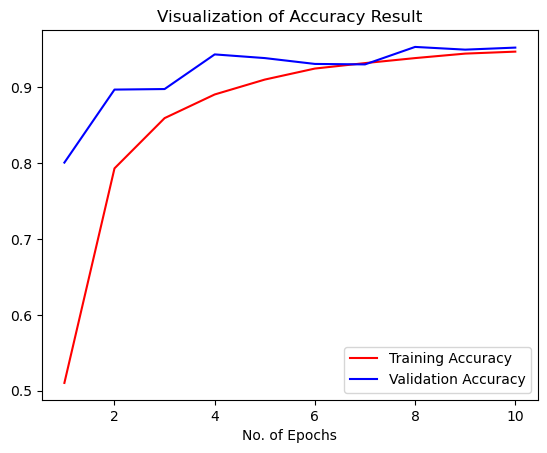

In [22]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [23]:
class_name = validation_set.class_names

In [24]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 11149 files belonging to 24 classes.


In [25]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

11149/11149 ━━━━━━━━━━━━━━━━━━━━ 161s 14ms/step


In [26]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [27]:
predicted_categories

<tf.Tensor: shape=(11149,), dtype=int64, numpy=array([ 0,  0,  0, ..., 23, 23, 23], dtype=int64)>

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [29]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.84      0.90       504
                                 Apple___Black_rot       0.94      0.97      0.96       497
                          Apple___Cedar_apple_rust       0.94      0.98      0.96       440
                                   Apple___healthy       0.81      0.92      0.86       502
                               Blueberry___healthy       0.99      0.77      0.87       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.89      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.99      0.

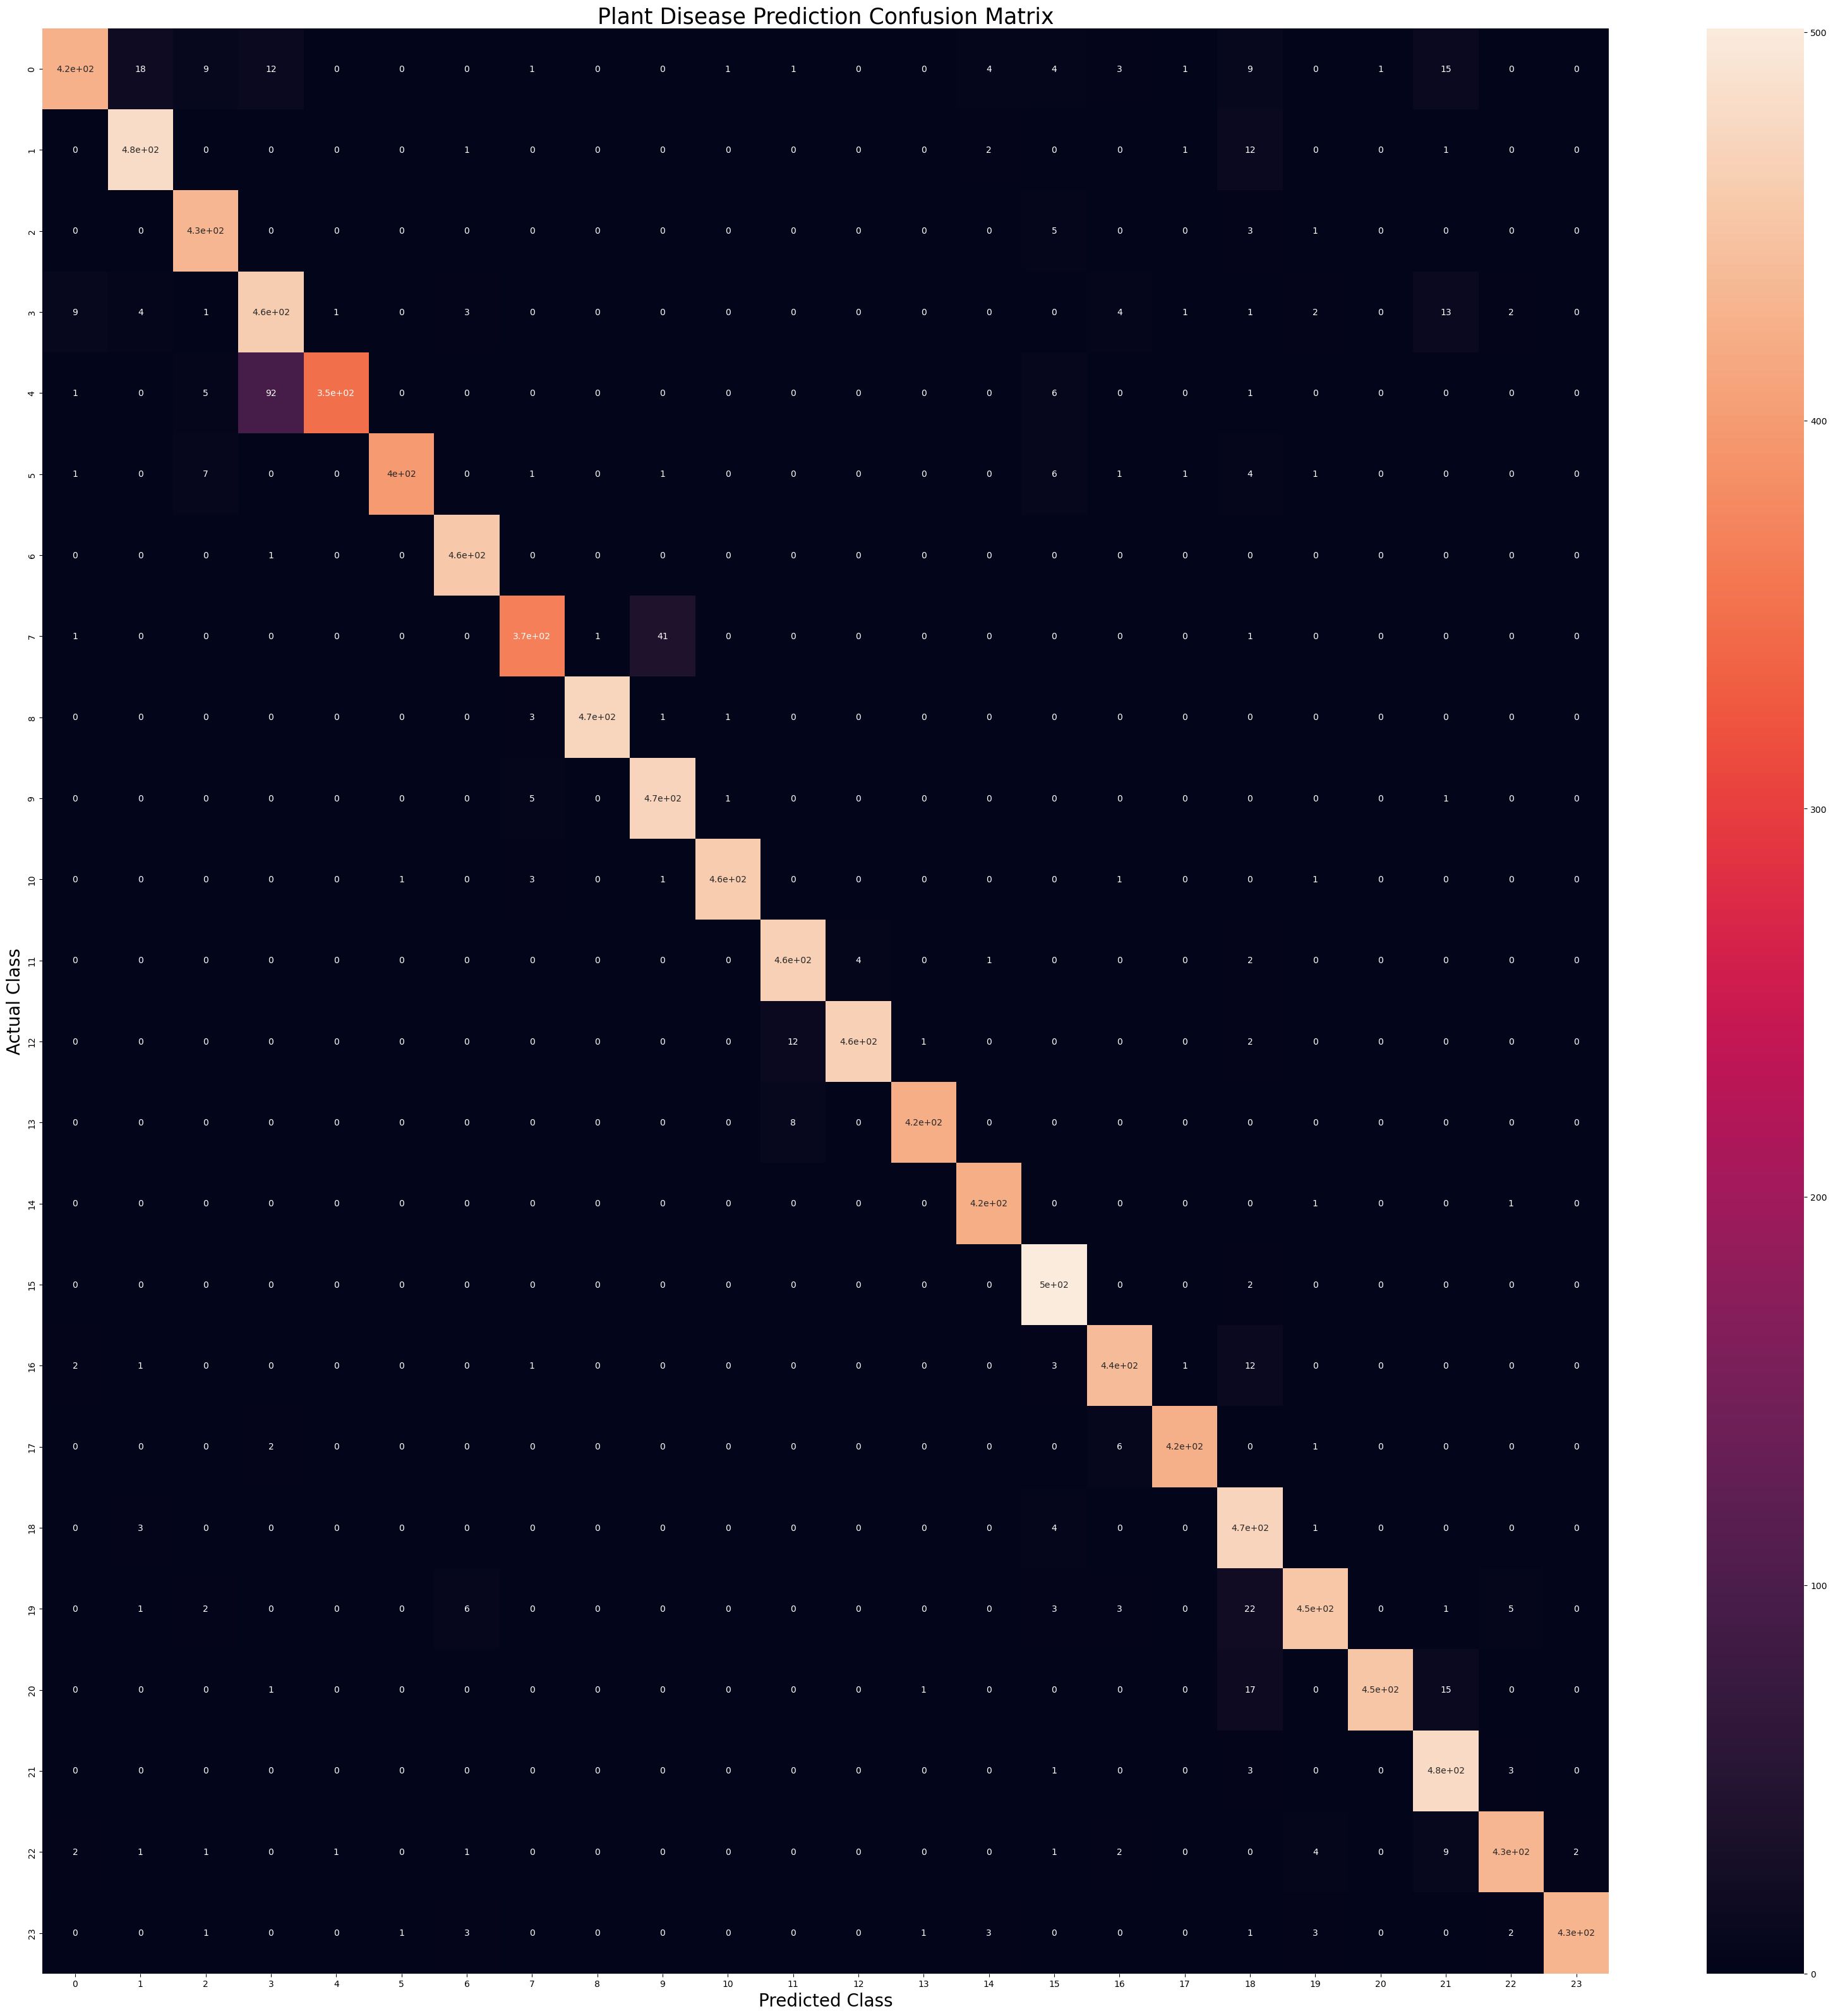

In [30]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()